In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'): # for local test, refer to files in ./ps04e04data/*.csv
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
# !pip install scikit-learn --upgrade #1.4.2
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
abalone = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')

abalone = abalone.drop('id', axis=1)

# print(abalone.head())
# print(abalone.info())
# print(abalone.describe())

In [4]:
print(abalone['Sex'].value_counts())

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64


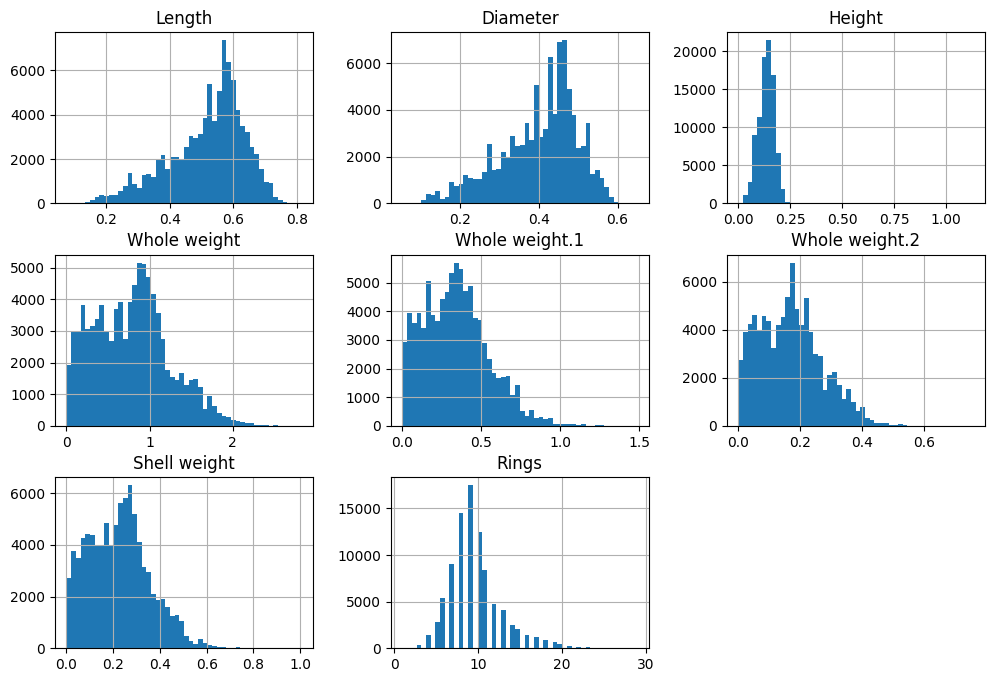

In [5]:
import matplotlib.pyplot as plt
abalone.hist(bins=50, figsize=(12,8))

plt.show()

In [6]:
corr_matrix = abalone.corr(numeric_only=True)
print(corr_matrix['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.694766
Height            0.665772
Diameter          0.636832
Length            0.623786
Whole weight      0.617274
Whole weight.2    0.588954
Whole weight.1    0.515067
Name: Rings, dtype: float64


In [7]:
abalone_X = abalone.drop('Rings', axis=1) # X
abalone_y = abalone['Rings'].copy() # y

In [8]:
from sklearn.model_selection import train_test_split
abalone_train_X, abalone_valid_X, abalone_train_y, abalone_valid_y = train_test_split(abalone_X, abalone_y, test_size=0.2, random_state=42)

In [9]:
abalone_cat = abalone_train_X[['Sex']]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
abalone_cat_1hot = cat_encoder.fit_transform(abalone_cat)
print(abalone_cat_1hot)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [10]:
abalone_cat_encoded = pd.DataFrame(abalone_cat_1hot, columns=cat_encoder.get_feature_names_out(['Sex']))
# print(abalone_cat_encoded.head())

abalone_encoded_X = pd.concat([abalone_train_X, abalone_cat_encoded], axis=1)
# print(abalone_encoded.head())

abalone_encoded_X = abalone_encoded_X.drop(['Sex'], axis=1)
print(abalone_encoded_X.head())
print(abalone_encoded_X.info())

       Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
43718   0.650     0.505   0.175        1.3850          0.7105          0.3020   
45247   0.670     0.520   0.195        1.5405          0.6370          0.3455   
71393   0.605     0.495   0.150        1.1345          0.5585          0.2470   
51688   0.680     0.560   0.200        1.5340          0.6900          0.3060   
40681   0.295     0.200   0.075        0.1075          0.0350          0.0190   

       Shell weight  Sex_F  Sex_I  Sex_M  
43718         0.360    0.0    1.0    0.0  
45247         0.385    0.0    0.0    1.0  
71393         0.285    0.0    0.0    1.0  
51688         0.440    0.0    0.0    1.0  
40681         0.038    1.0    0.0    0.0  
<class 'pandas.core.frame.DataFrame'>
Index: 87125 entries, 43718 to 72488
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          72492 non-null  float64
 1   Diamete

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Height', 'Whole weight', 'Whole weight.1', 'Shell weight']
abalone_scaled = scaler.fit_transform(abalone_encoded_X[columns_to_scale])
abalone_scaled_df = pd.DataFrame(abalone_scaled, columns=columns_to_scale)

print(abalone_encoded_X[columns_to_scale].head())
print(abalone_encoded_X[columns_to_scale].describe())

print()
print("=====================================================================")
print()

print(abalone_scaled_df.head())
print(abalone_scaled_df.describe())

       Height  Whole weight  Whole weight.1  Shell weight
43718   0.175        1.3850          0.7105         0.360
45247   0.195        1.5405          0.6370         0.385
71393   0.150        1.1345          0.5585         0.285
51688   0.200        1.5340          0.6900         0.440
40681   0.075        0.1075          0.0350         0.038
             Height  Whole weight  Whole weight.1  Shell weight
count  72492.000000  72492.000000    72492.000000  72492.000000
mean       0.135494      0.788975        0.340872      0.225920
std        0.038075      0.457240        0.204289      0.130134
min        0.000000      0.002000        0.001000      0.001500
25%        0.110000      0.419500        0.178500      0.120000
50%        0.140000      0.799500        0.330000      0.225000
75%        0.160000      1.066625        0.462500      0.305000
max        1.130000      2.825500        1.488000      1.005000


     Height  Whole weight  Whole weight.1  Shell weight
0  0.154867      0

In [12]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
some_num_pipeline = make_pipeline(MinMaxScaler())

preprocessing = ColumnTransformer([
    ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
    ('num', some_num_pipeline, ['Height', 'Whole weight', 'Whole weight.1', 'Shell weight'])
])

In [13]:
# from https://github.com/scikit-learn/scikit-learn/blob/8721245511de2f225ff5f9aa5f5fadce663cd4a3/sklearn/metrics/_regression.py#L522
# my kaggle kernel does not use latest scikit-learn, despite me updating it or using "Always use latest environment"
# from sklearn.metrics import root_mean_squared_error
# def root_mean_squared_log_error(y_true, y_pred, *, sample_weight=None, multioutput="uniform_average"):
    
#     return root_mean_squared_error(
#         np.log1p(y_true),
#         np.log1p(y_pred),
#         sample_weight=sample_weight,
#         multioutput=multioutput,
#     )

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

model = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

model.fit(abalone_train_X, abalone_train_y) # fit with the train data
abalone_predictions = model.predict(abalone_valid_X) # predict based on the validation data
rmsle = np.sqrt(mean_squared_log_error(abalone_valid_y, abalone_predictions)) # should be doing cross validation... I am running short of time
print(rmsle)

0.1612979817028073


In [15]:
from sklearn.model_selection import cross_val_score
# sklearn.metrics.get_scorer_names()
model_rmsle = -1 * cross_val_score(model, abalone_train_X, abalone_train_y, scoring='neg_root_mean_squared_error')
print(model_rmsle)

[1.92863026 1.95955831 1.93294053 1.93470955 1.91846655]


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

model = make_pipeline(preprocessing, XGBRegressor(n_estimators=500, learning_rate=0.06, random_state=42, gamma=0.4)) # early_stopping_rounds=5,
model.fit(abalone_train_X, abalone_train_y)

abalone_predictions = model.predict(abalone_valid_X)
rmsle = np.sqrt(mean_squared_log_error(abalone_valid_y, abalone_predictions))
print(rmsle)

0.1537270564415715


In [17]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# full_pipeline = Pipeline([('preprocessing', preprocessing),
#                          ('random_forest', RandomForestRegressor(random_state=42))])

# param_distribs = {'random_forest__max_features':randint(low=2, high=10)}

# random_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=20, cv=5,
#                                    scoring='neg_root_mean_squared_error', random_state=42)

# random_search.fit(abalone_train_X, abalone_train_y)

# final_model = random_search.best_estimator_
# feature_importances = final_model['random_forest'].feature_importances_
# print(feature_importances.round(2))

# print(sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse=True))

# final_predictions = final_model.predict(abalone_valid_X)
# final_rmse = np.sqrt(mean_squared_log_error(abalone_valid_y, final_predictions))
# print(final_rmse)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

model = make_pipeline(make_column_transformer((OrdinalEncoder(), ["Sex"]), remainder='passthrough'), HistGradientBoostingRegressor(categorical_features=[0], random_state=42))
# model = make_pipeline(preprocessing, HistGradientBoostingRegressor(categorical_features=[0], random_state=42))
model.fit(abalone_train_X, abalone_train_y)

abalone_predictions = model.predict(abalone_valid_X)
rmsle = np.sqrt(mean_squared_log_error(abalone_valid_y, abalone_predictions))
print(rmsle)

0.1532782958416063


In [19]:
# from sklearn.model_selection import cross_val_score
# model_rmsle = -1 * cross_val_score(final_model, abalone_train_X, abalone_train_y, scoring='neg_root_mean_squared_error')
# print(model_rmsle)

In [20]:
abalone_test_df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
abalone_test_X = abalone_test_df.drop('id', axis=1)
abalone_test_predictions = model.predict(abalone_test_X)

test_df = pd.DataFrame({'id': abalone_test_df['id'], 'Rings': abalone_test_predictions})
test_df.to_csv("submission.csv", index=False)

In [21]:
submission_df = pd.read_csv('/kaggle/working/submission.csv')
print(submission_df.head())

      id      Rings
0  90615   9.340141
1  90616   9.705613
2  90617  10.251516
3  90618   9.997409
4  90619   7.540088
